<a href="https://colab.research.google.com/github/divyanshuaggarwal/ML_projects/blob/master/sound_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import IPython.display as ipd



In [2]:

from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Apr  1 21:32 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          22611  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          16758  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          18559  
lava18/google-play-store-apps                                Google Play Store Apps                                2MB  2019-02-03 13:55:47          46172  
bigquery/crypto-ethereum-classic                          

In [8]:
!kaggle datasets download -d pavansanagapati/urban-sound-classification

100% 5.56G/5.57G [02:42<00:00, 28.7MB/s]
100% 5.57G/5.57G [02:42<00:00, 36.8MB/s]


In [0]:
!cd sample_data


In [10]:
!ls

kaggle.json  sample_data  urban-sound-classification.zip


In [11]:
!unzip urban-sound-classification.zip

Archive:  urban-sound-classification.zip
  inflating: img.zip                 
  inflating: train.zip               
  inflating: test.csv                
  inflating: test.zip                
  inflating: train.csv               


In [12]:
!ls

img.zip      sample_data  test.zip   train.zip
kaggle.json  test.csv	  train.csv  urban-sound-classification.zip


In [13]:
!unzip train.zip

Archive:  train.zip
   creating: Train/
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: Train/0.wav             
  inflating: Train/1.wav             
  inflating: Train/10.wav            
  inflating: Train/100.wav           
  inflating: Train/1000.wav          
  inflating: Train/1001.wav          
  inflating: Train/1003.wav          
  inflating: Train/1004.wav          
  inflating: Train/1006.wav          
  inflating: Train/1007.wav          
  inflating: Train/1008.wav          
  inflating: Train/101.wav           
  inflating: Train/1014.wav          
  inflating: Train/1015.wav          
  inflating: Train/1017.wav          
  inflating: Train/1018.wav          
  inflating: Train/1021.wav          
  inflating: Train/1022.wav          
  inflating: Train/1024.wav          
  inflating: Train/1025.wav          
  inflating: Train/1026.wav          
  inflating: Train/1027.wav          
  inflating: Train/1028.wav          
  inflating: Train/1029.wav

In [14]:
!unzip test.zip

Archive:  test.zip
   creating: Test/
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: Test/1002.wav           
  inflating: Test/1005.wav           
  inflating: Test/1009.wav           
  inflating: Test/1010.wav           
  inflating: Test/1011.wav           
  inflating: Test/1012.wav           
  inflating: Test/1013.wav           
  inflating: Test/1016.wav           
  inflating: Test/1019.wav           
  inflating: Test/102.wav            
  inflating: Test/1020.wav           
  inflating: Test/1023.wav           
  inflating: Test/1031.wav           
  inflating: Test/1033.wav           
  inflating: Test/1035.wav           
  inflating: Test/1037.wav           
  inflating: Test/1039.wav           
  inflating: Test/1041.wav           
  inflating: Test/1046.wav           
  inflating: Test/1050.wav           
  inflating: Test/1053.wav           
  inflating: Test/1057.wav           
  inflating: Test/106.wav            
  inflating: Test/1060.wav    

In [15]:
!unzip img.zip

Archive:  img.zip
   creating: img/
  inflating: img/audio-features.png  
  inflating: img/sound.png           
  inflating: img/time_freq.png       


In [17]:
!ls

img	     sample_data  test.zip   train.zip
img.zip      Test	  Train      urban-sound-classification.zip
kaggle.json  test.csv	  train.csv


In [19]:
import IPython.display as ipd
ipd.Audio('Train/2022.wav')

In [20]:
!pip install librosa

In [0]:
import librosa
data, sampling_rate = librosa.load('Train/2022.wav')


Populating the interactive namespace from numpy and matplotlib


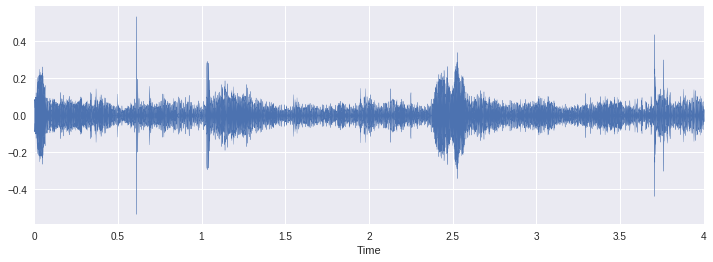

In [27]:
%pylab inline
import os
import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [0]:
train = pd.read_csv("train.csv")

In [32]:
train.index

RangeIndex(start=0, stop=5435, step=1)

Class:  siren
Class:  air_conditioner
Class:  drilling
Class:  drilling
Class:  drilling
Class:  jackhammer
Class:  car_horn
Class:  dog_bark
Class:  dog_bark
Class:  jackhammer


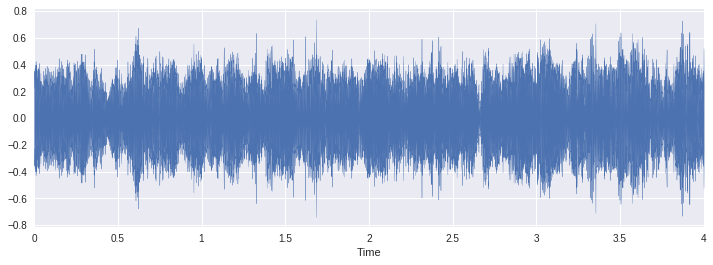

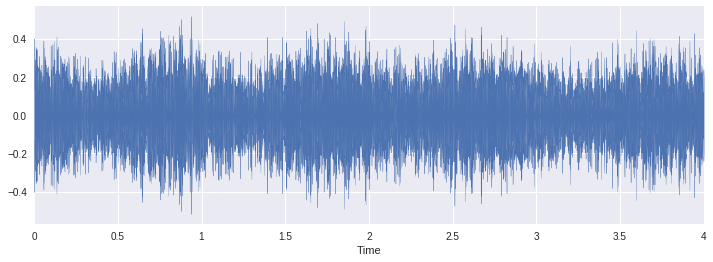

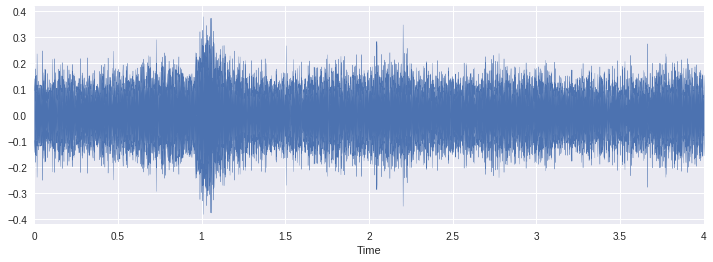

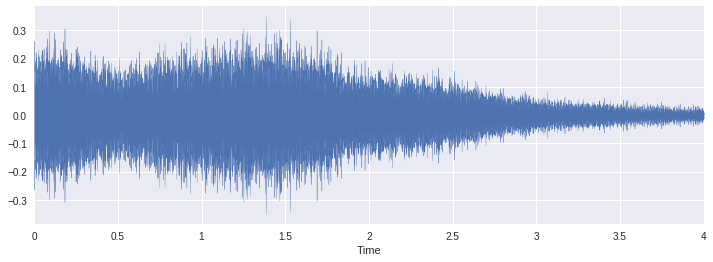

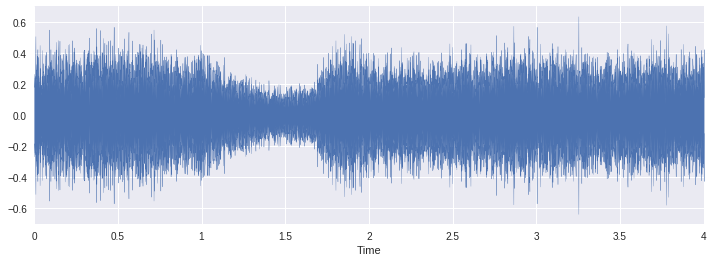

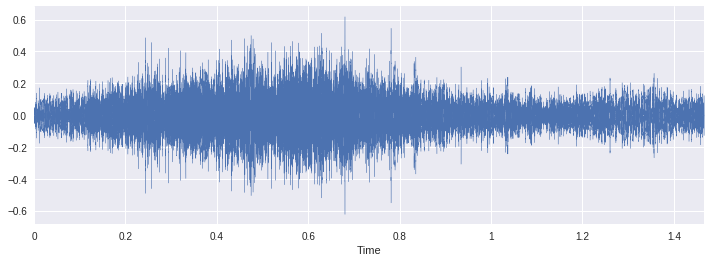

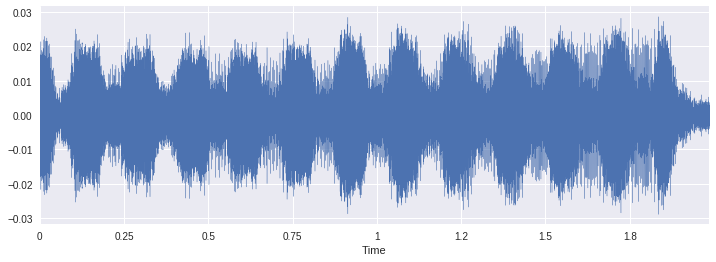

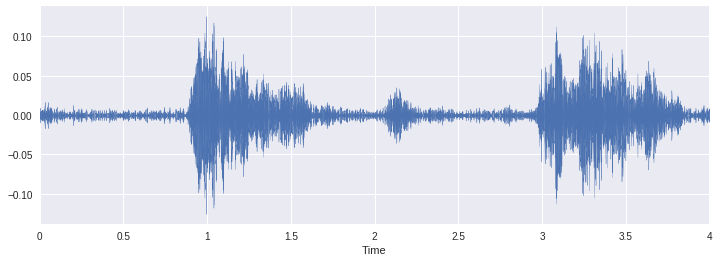

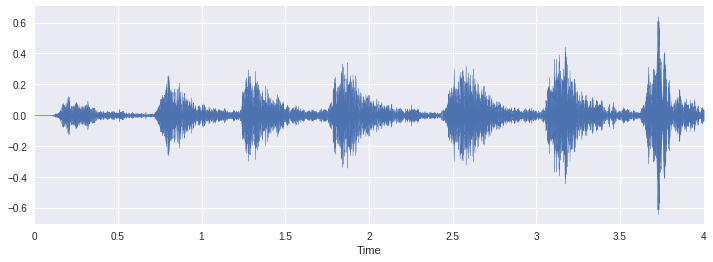

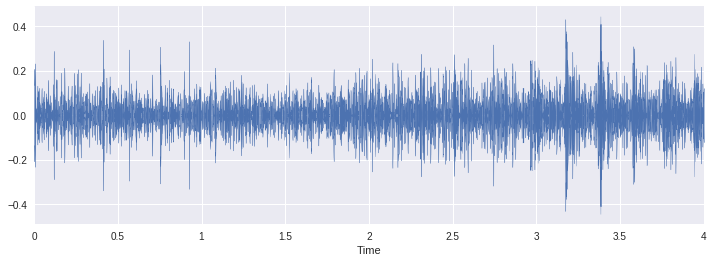

In [38]:
for k in range(10):
  i = random.choice(train.index)

  audio_name = train.ID[i]
  
  path = os.path.join('Train', str(audio_name) + '.wav')
  x, sr = librosa.load('Train/' + str(train.ID[i]) + '.wav')
  
  print('Class: ', train.Class[i])
  
  plt.figure(figsize=(12, 4))
  librosa.display.waveplot(x, sr=sr)

In [39]:
train.Class.value_counts()

jackhammer          668
engine_idling       624
siren               607
air_conditioner     600
street_music        600
dog_bark            600
drilling            600
children_playing    600
car_horn            306
gun_shot            230
Name: Class, dtype: int64

In [0]:
def parser(row):
   # function to load files and extract features
   file_name = os.path.join('Train', str(row.ID) + '.wav')

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file)
      return None, None
 
   feature = mfccs
   label = row.Class
 
   return [feature, label]

temp = train.apply(parser, axis=1)
temp.columns = ['feature', 'label']

In [0]:
from sklearn.preprocessing import LabelEncoder

X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())

lb = LabelEncoder()

y = np_utils.to_categorical(lb.fit_transform(y))


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [0]:
model.fit(X, y, batch_size=32, epochs=5, validation_data=(val_x, val_y))